#### Student Performance Indicator

#### Problem Statement
This project understands how the students academic performance is affected by variables such as gender,ethnicity,parental level of education,lunch and Test prep

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

All means are very close to each other between 66 and 68.05
All standard deviations are close to each other between 14.6 and 15.19
minimum score in maths is 0,in reading it is 17 and in writing it is 10

In [9]:
print("Categories in gender: ",end=" ")
print(df['gender'].unique())
print("Categories in race_ethnicity: ",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in lunch: ",end=" ")
print(df['lunch'].unique())
print("Categories in parental_level_of_education: ",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in test_preparation_course: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch:  ['standard' 'free/reduced']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in test_preparation_course:  ['none' 'completed']


In [10]:
numerical_feature = [features for features in df.columns if df[features].dtype!='object']
categorical_feature = [features for features in df.columns if df[features].dtype=='object']

print(f"{len(numerical_feature)} are the {numerical_feature}")
print(f"{len(categorical_feature)} are the {categorical_feature}")

3 are the ['math_score', 'reading_score', 'writing_score']
5 are the ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for Total Score and Average Score

In [11]:
df["Total_score"]=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of students with full in reading: {reading_full}")
print(f"Number of students with full in writing: {writing_full}")
print(f"Number of students with full in math: {math_full}")

Number of students with full in reading: 17
Number of students with full in writing: 14
Number of students with full in math: 7


In [13]:
reading_less_33= df[df['reading_score']<=33]['average'].count()
writing_less_33= df[df['writing_score']<=33]['average'].count()
math_less_33= df[df['math_score']<=33]['average'].count()

print(f"Number of students with less than or equal to 33 in reading: {reading_less_33}")
print(f"Number of students with less than or equal to 33 in writing: {writing_less_33}")
print(f"Number of students with less than or equal to 33 in math: {math_less_33}")

Number of students with less than or equal to 33 in reading: 11
Number of students with less than or equal to 33 in writing: 14
Number of students with less than or equal to 33 in math: 20


Data Visualization

<Axes: xlabel='Total_score', ylabel='Count'>

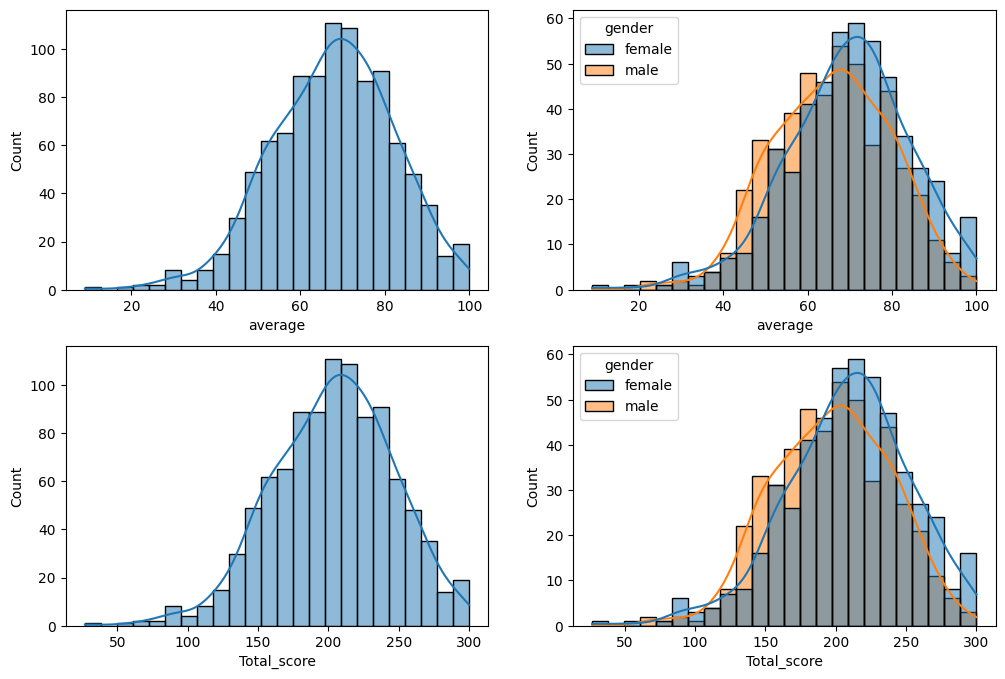

In [22]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
plt.subplot(221)
sns.histplot(data=df,x = 'average',kde=True)
plt.subplot(222)
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.subplot(223)
sns.histplot(data=df,x='Total_score',kde=True)
plt.subplot(224)
sns.histplot(data=df,x='Total_score',hue='gender',kde=True)

Female students tend to have both average and total score more than male students

<Axes: title={'center': 'Male'}, xlabel='average', ylabel='Count'>

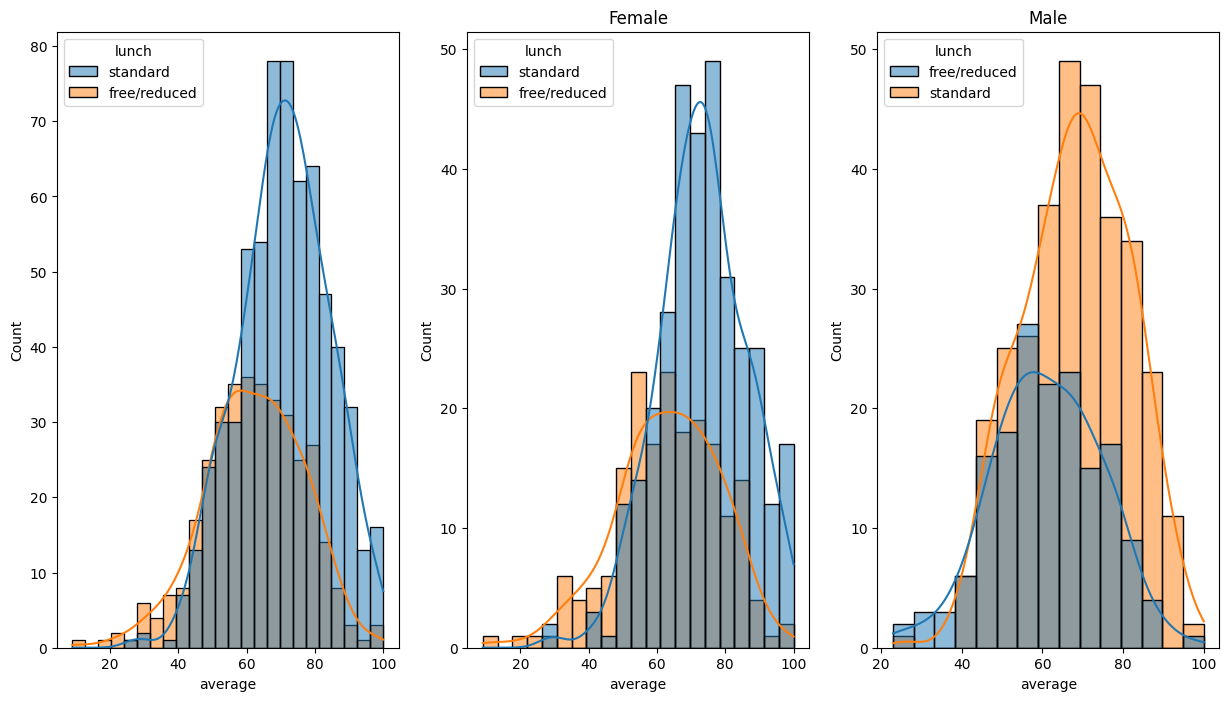

In [25]:
fig,axs = plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

For both male and females standard lunch help in better average compared to free/educated lunch

<Axes: title={'center': 'Male'}, xlabel='average', ylabel='Count'>

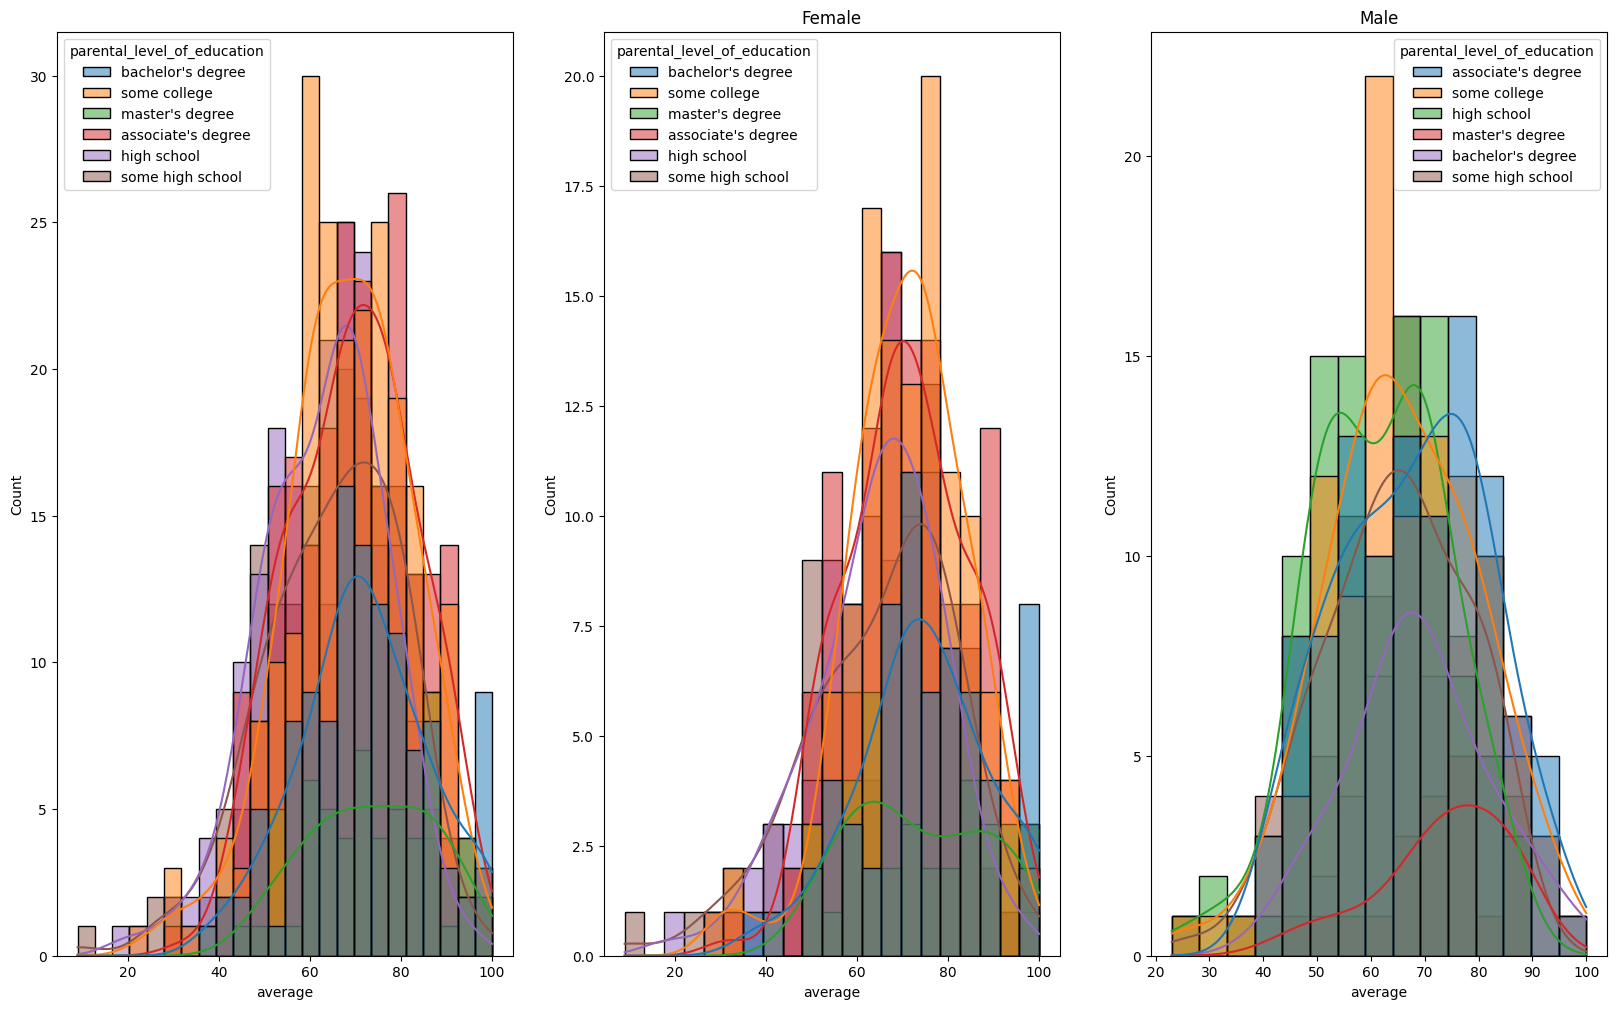

In [28]:
fig,axs = plt.subplots(1,3,figsize=(20,12))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

- In general parental level of education does not affect student performance that much


<Axes: title={'center': 'Male'}, xlabel='average', ylabel='Count'>

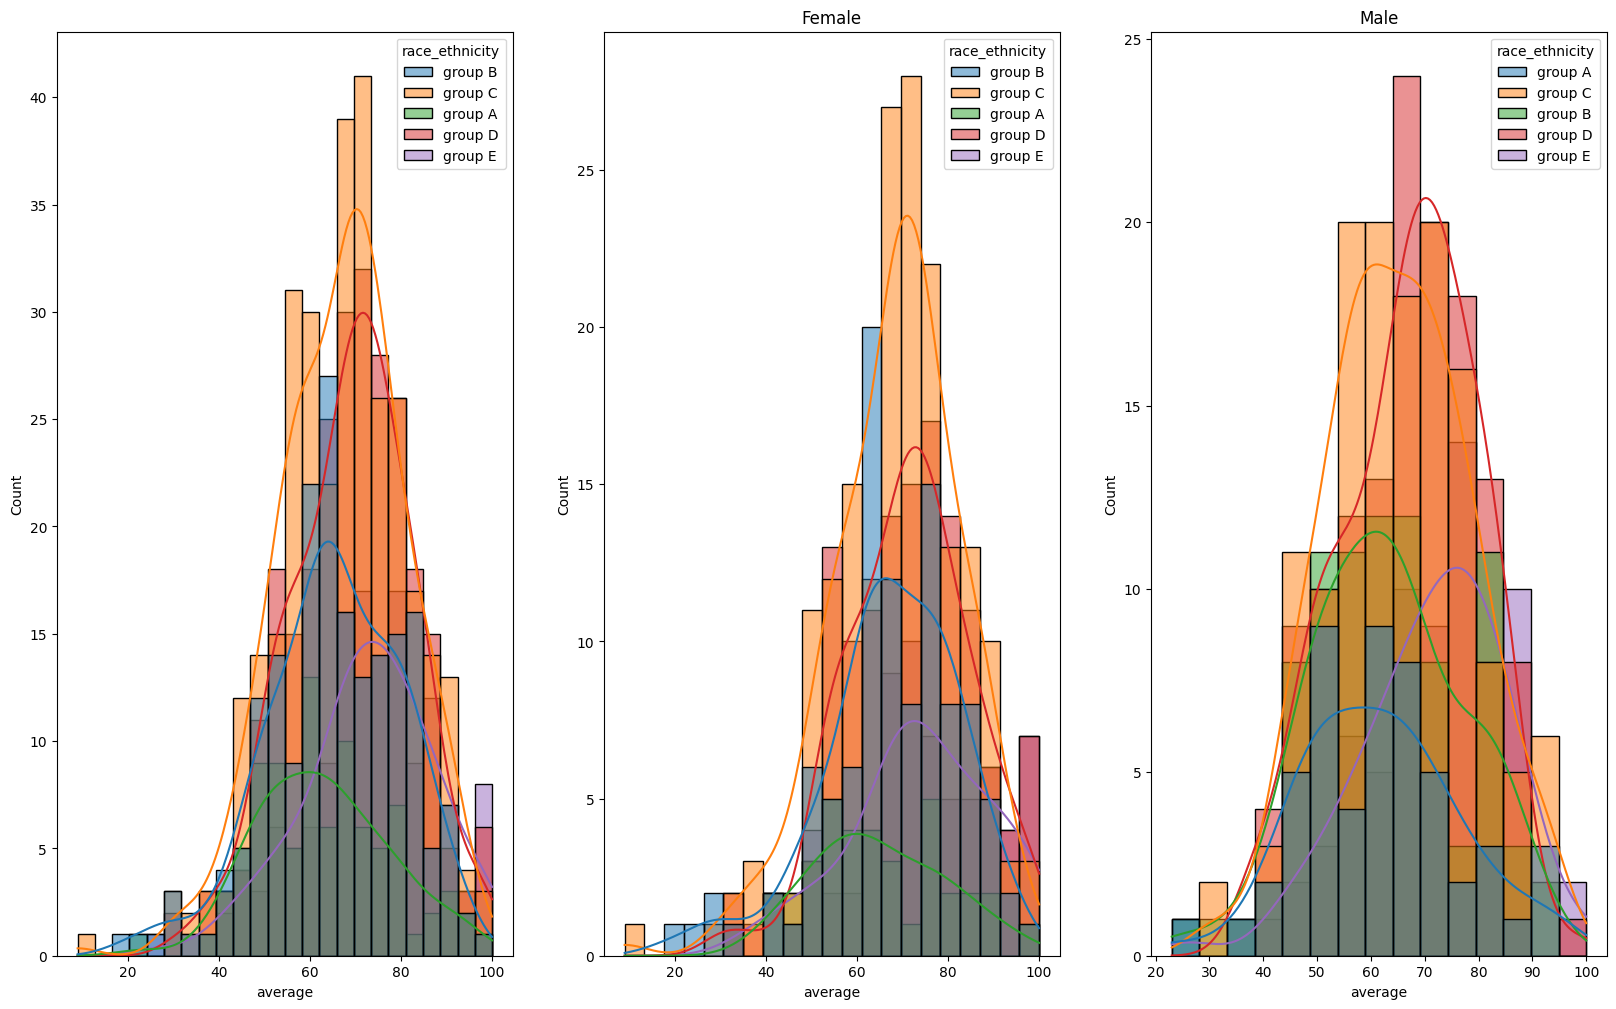

In [29]:
fig,axs = plt.subplots(1,3,figsize=(20,12))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')

- Students of group A and B have lowest average
- Group C has highest average


<Axes: xlabel='gender', ylabel='writing_score'>

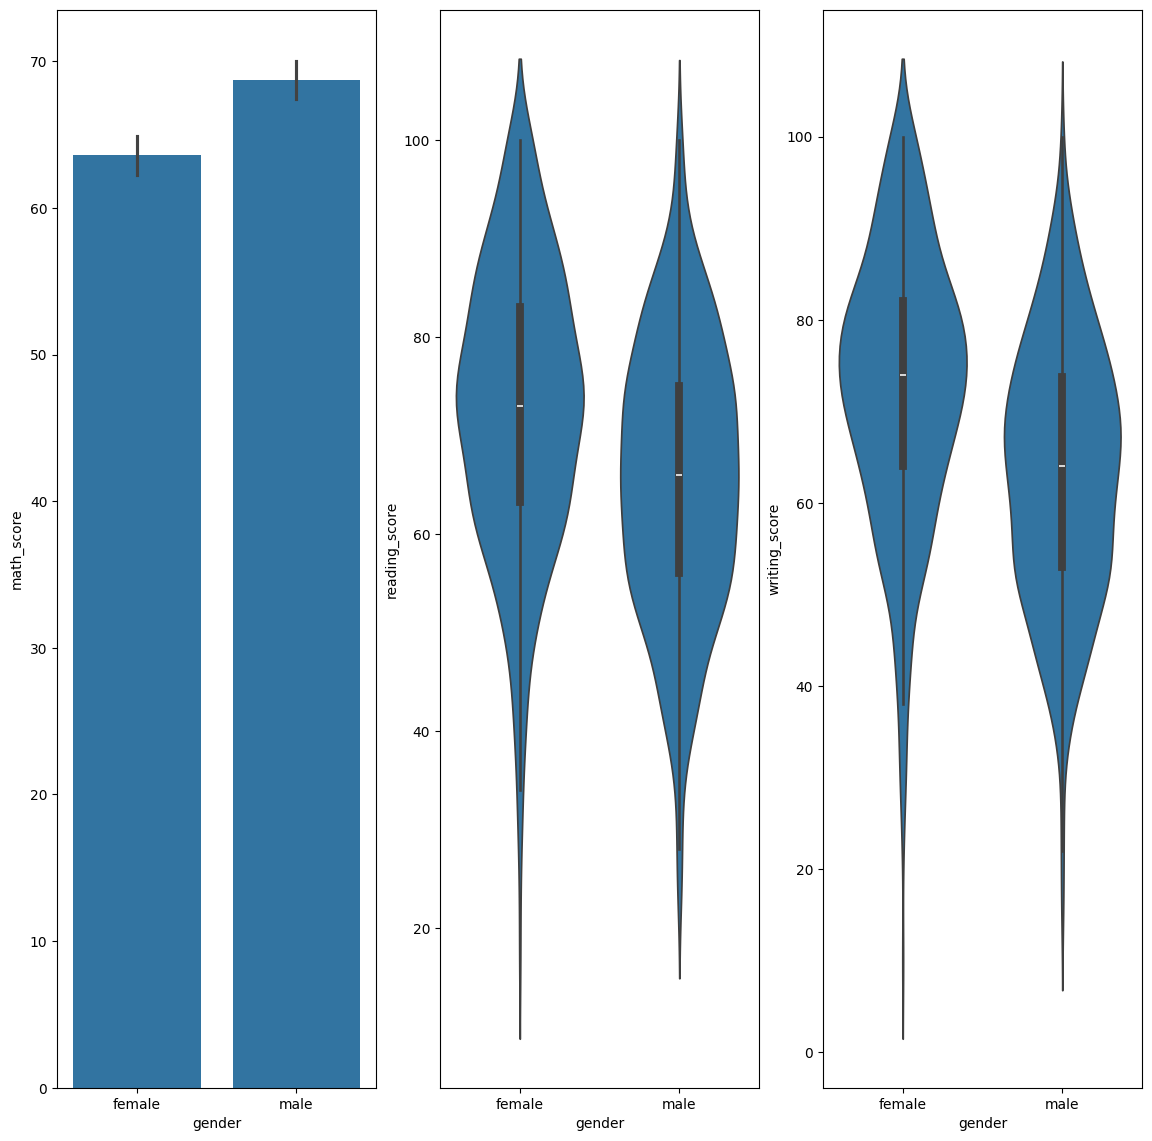

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(14,14))
plt.subplot(131)
sns.violinplot(x='gender',y='math_score',data=df)
plt.subplot(132)
sns.violinplot(x='gender',y='reading_score',data=df)
plt.subplot(133)
sns.violinplot(x='gender',y='writing_score',data=df)

<Axes: ylabel='writing_score'>

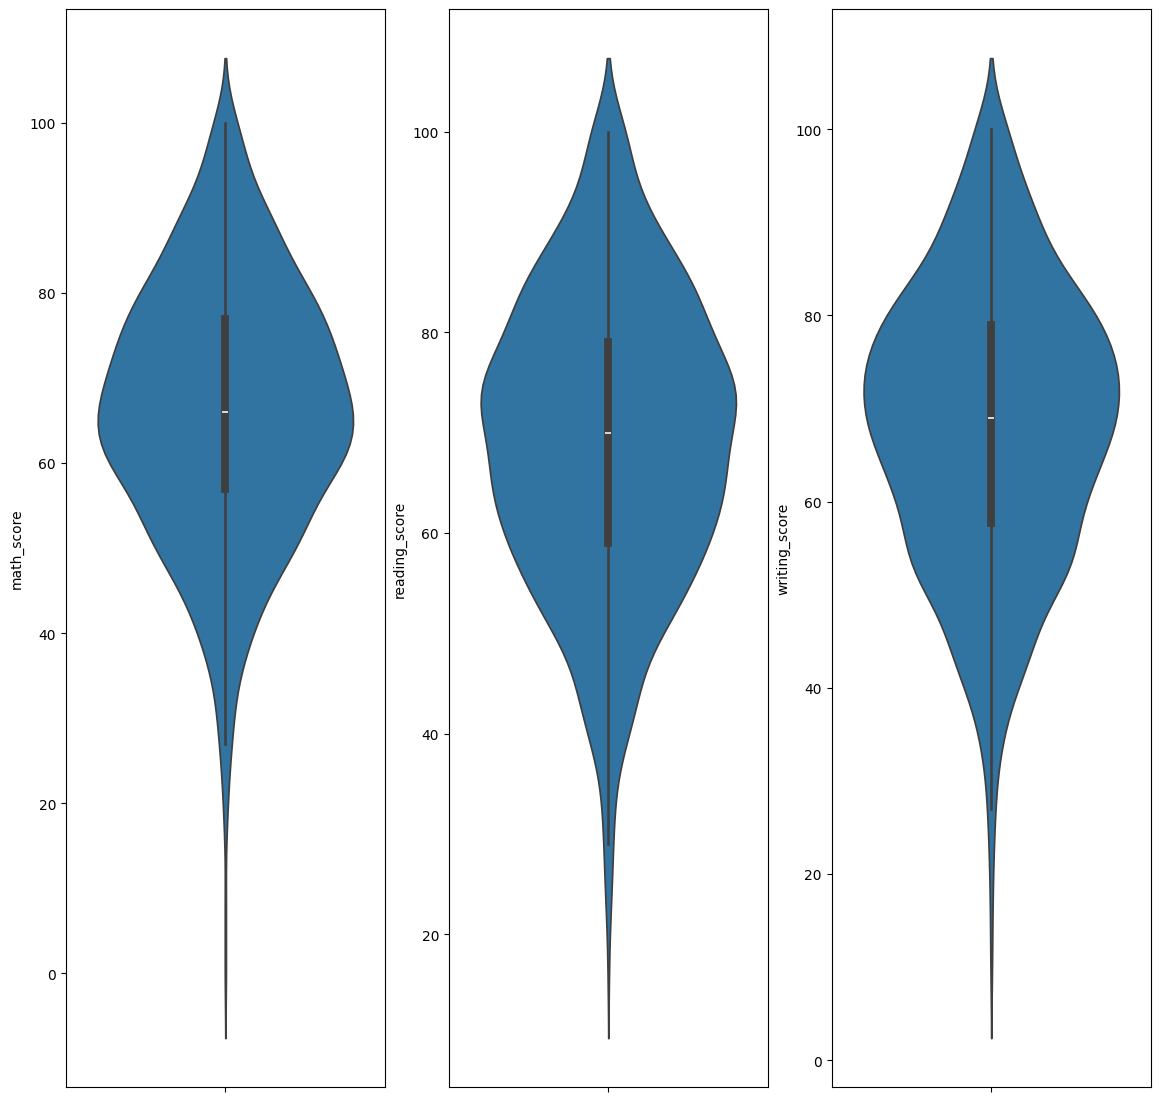

In [34]:
fig,axs = plt.subplots(1,3,figsize=(14,14))
plt.subplot(131)
sns.violinplot(y='math_score',data=df)
plt.subplot(132)
sns.violinplot(y='reading_score',data=df)
plt.subplot(133)
sns.violinplot(y='writing_score',data=df)

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate Analysis using pie plot

In [ ]:
#Categories in gender:  ['female' 'male']
#Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
#Categories in lunch:  ['standard' 'free/reduced']
#Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
#'high school' 'some high school']
#Categories in test_preparation_course:  ['none' 'completed']

([<matplotlib.patches.Wedge at 0x1bc998be480>,
 [Text(-0.4746018502673304, 0.9923472596439347, 'none'),
  Text(0.47460146383300333, -0.9923474444606439, 'completed')],
 [Text(-0.25887373650945295, 0.5412803234421462, '64.20%'),
  Text(0.2588735257270927, -0.5412804242512602, '35.80%')])

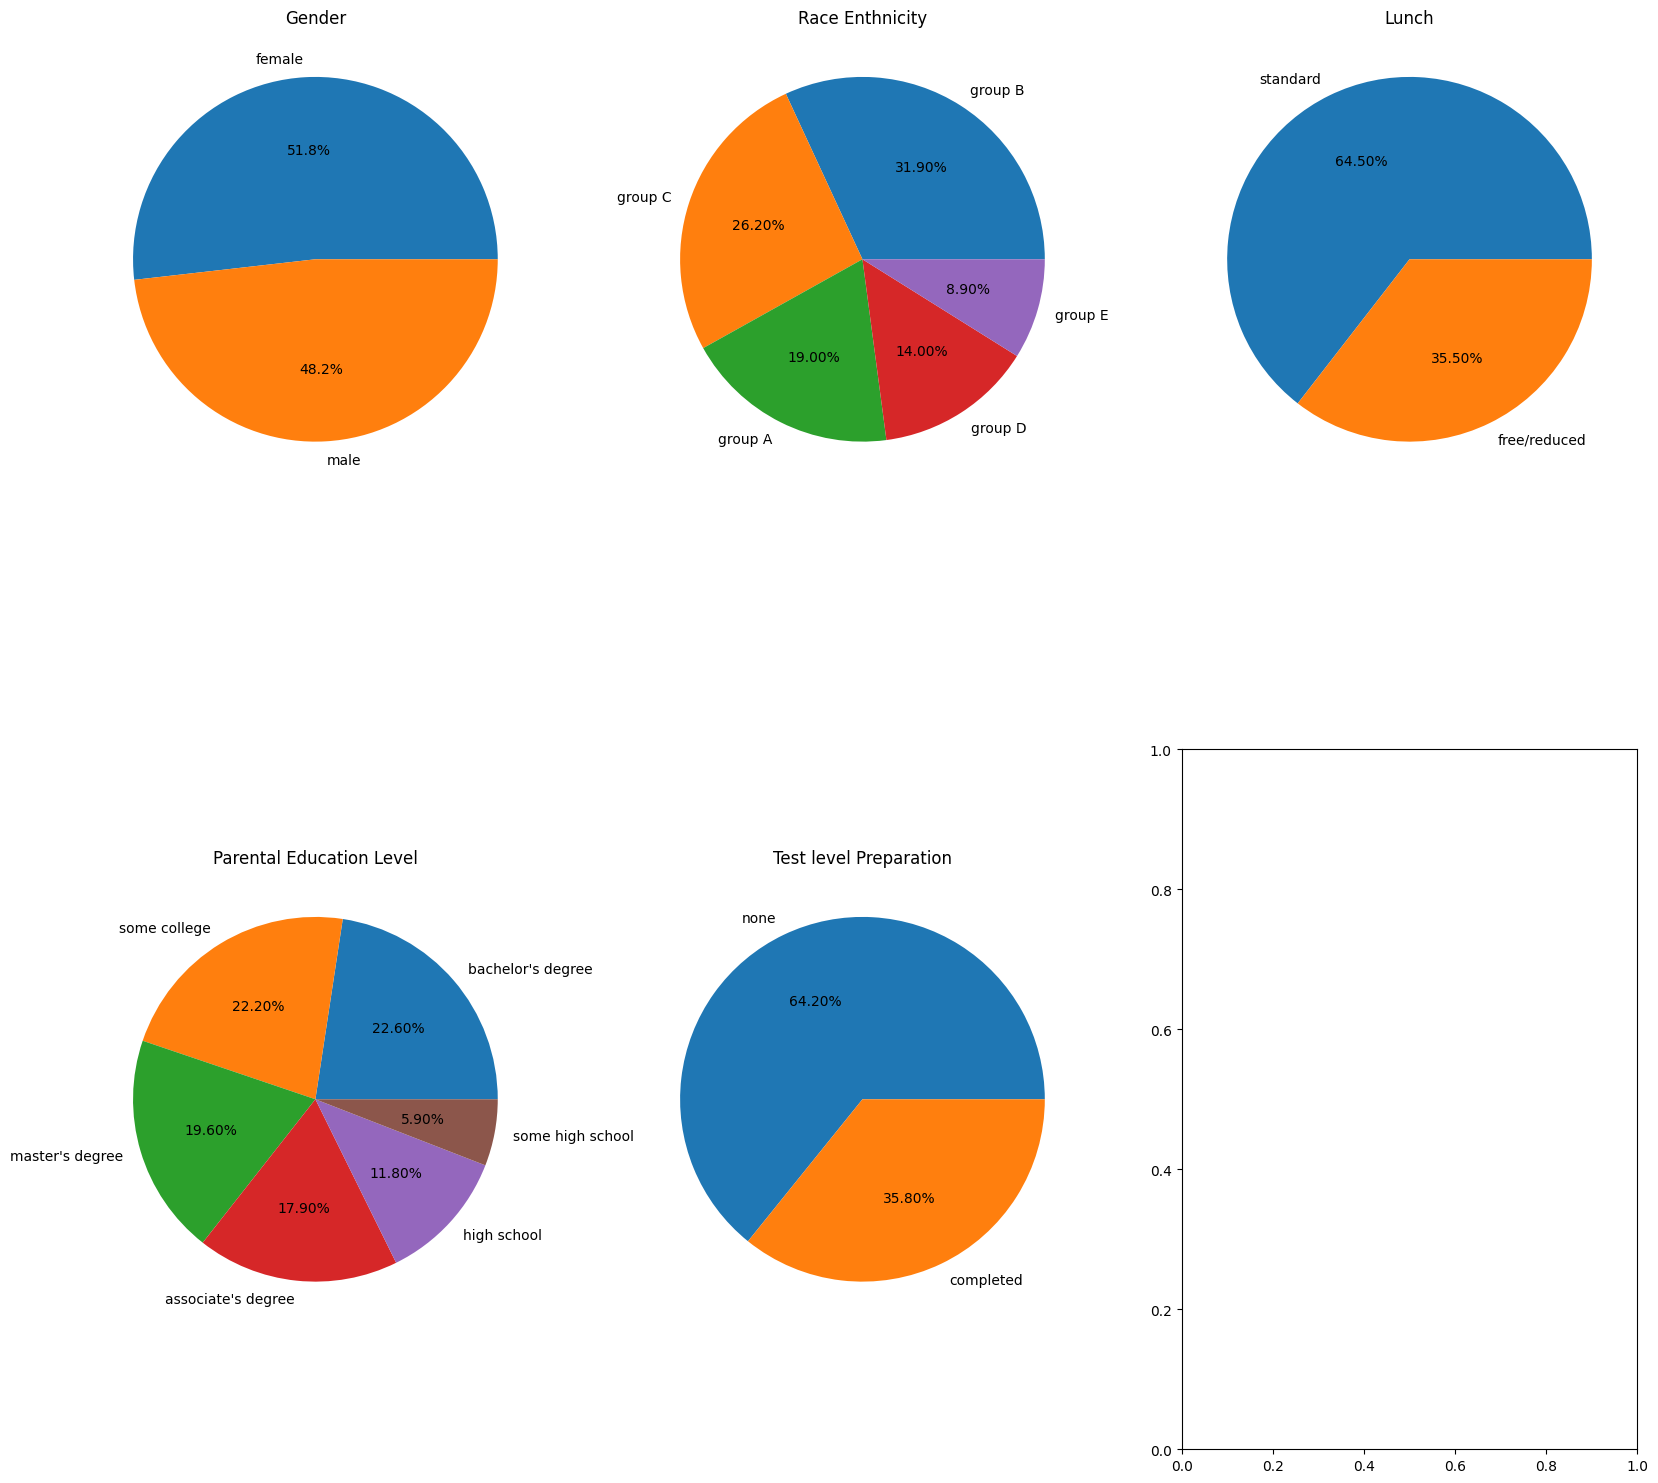

In [45]:
fig,axs = plt.subplots(2,3,figsize=(20,20))

size = df['gender'].value_counts()
labels=['female','male']
plt.subplot(231)
plt.title("Gender")
plt.pie(size,labels=labels,autopct="%1.1f%%")

size = df['race_ethnicity'].value_counts()
labels= ['group B','group C','group A','group D','group E']
plt.subplot(232)
plt.title("Race Enthnicity")
plt.pie(size,labels=labels,autopct="%.2f%%")

size = df['lunch'].value_counts()
labels= ['standard','free/reduced']
plt.subplot(233)
plt.title("Lunch")
plt.pie(size,labels=labels,autopct="%.2f%%")

size = df['parental_level_of_education'].value_counts()
labels= ["bachelor's degree" ,'some college' ,"master's degree" ,"associate's degree",'high school','some high school']
plt.subplot(234)
plt.title("Parental Education Level")
plt.pie(size,labels=labels,autopct="%.2f%%")

size = df['test_preparation_course'].value_counts()
labels= ['none','completed']
plt.subplot(235)
plt.title("Test level Preparation")
plt.pie(size,labels=labels,autopct="%.2f%%")

- Number of Male and Female students is almost equal
- Number students are most in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

([<matplotlib.patches.Wedge at 0x1bc9e191010>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'female'),
  Text(0.062170321584051766, -1.0982417088756626, 'male')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.80%'),
  Text(0.03391108450039187, -0.5990409321139978, '48.20%')])

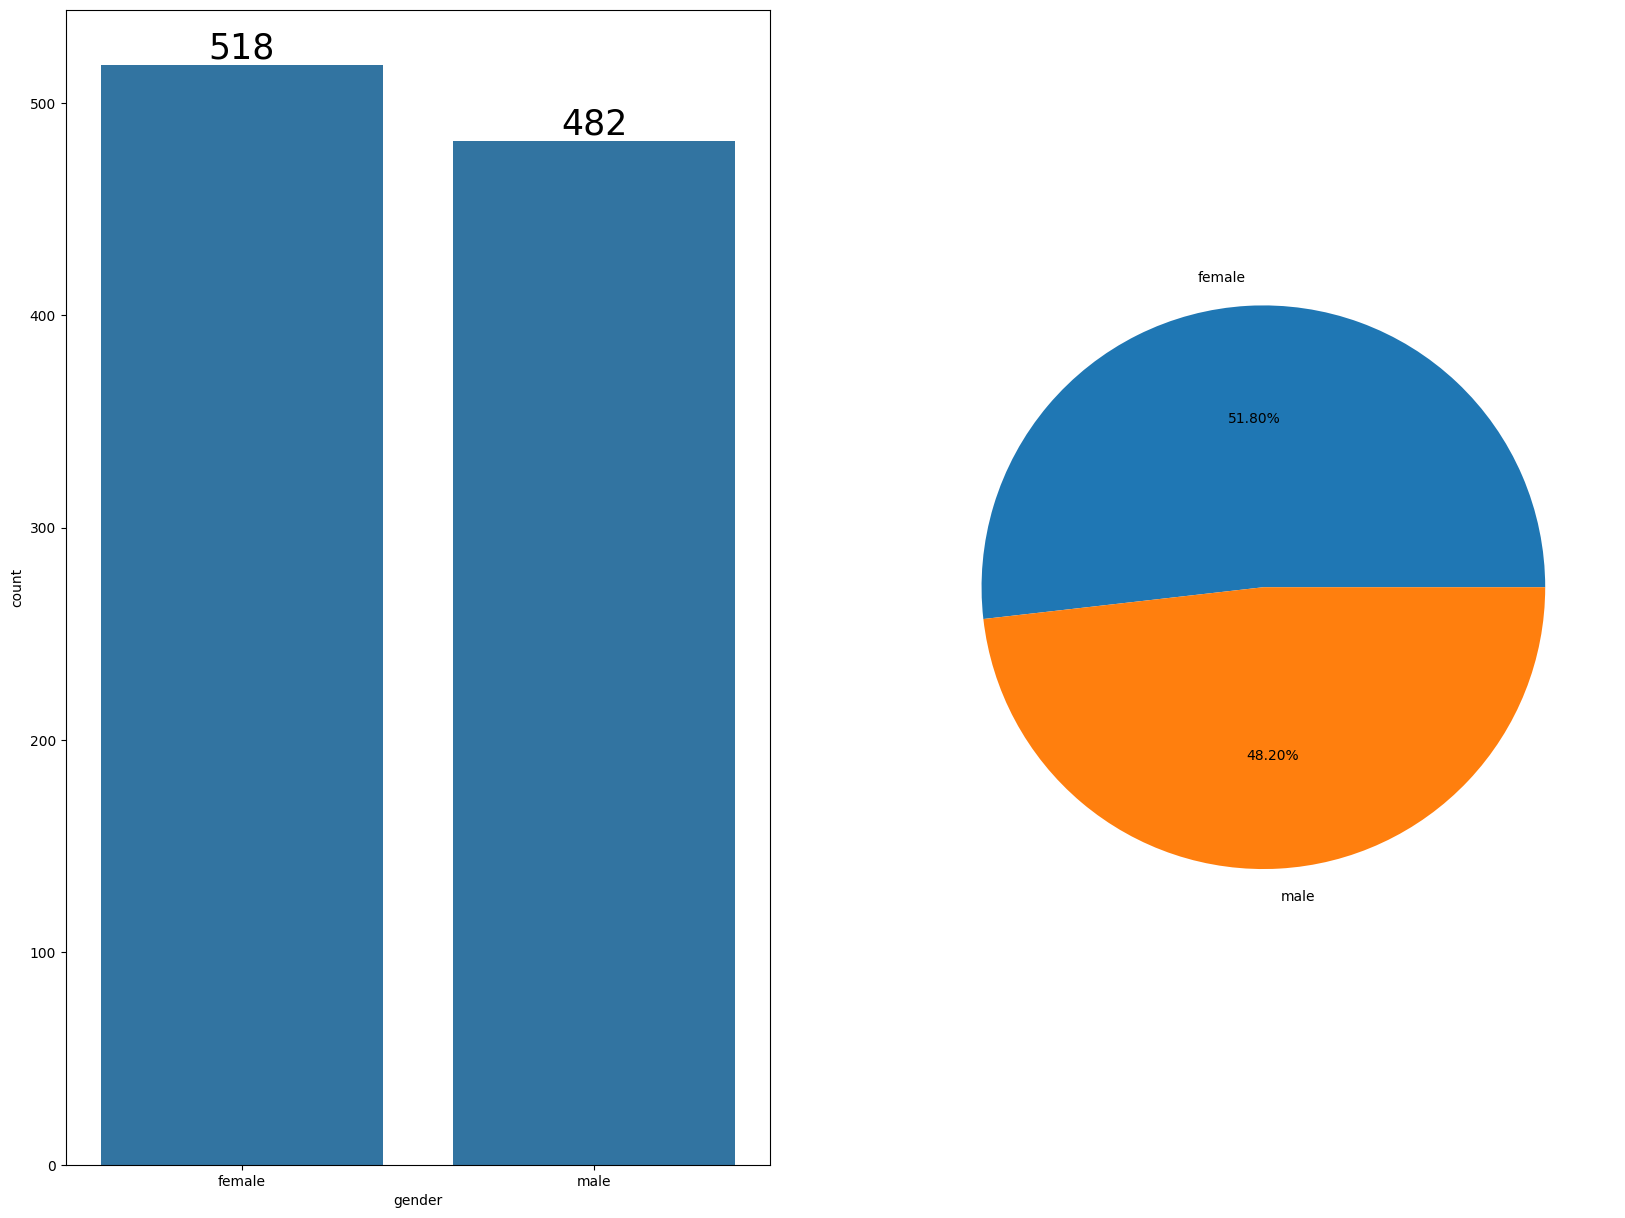

In [60]:
fig,ax = plt.subplots(1,2,figsize=(20,15))
sns.countplot(x=df['gender'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=25)
plt.subplot(122)
plt.pie(x=df['gender'].value_counts(),labels=['female','male'],autopct="%.2f%%")

- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

([<matplotlib.patches.Wedge at 0x1bc9e3c54c0>,
 [Text(0.5923243462640188, 0.9269044550669194, 'group B'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group C'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group A'),
  Text(0.5952332509117034, -0.9250391218803047, 'group D'),
  Text(1.0572819245745813, -0.30357030811307883, 'group E')],
 [Text(0.32308600705310114, 0.5055842482183196, '31.90%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.20%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.00%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.00%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.90%')])

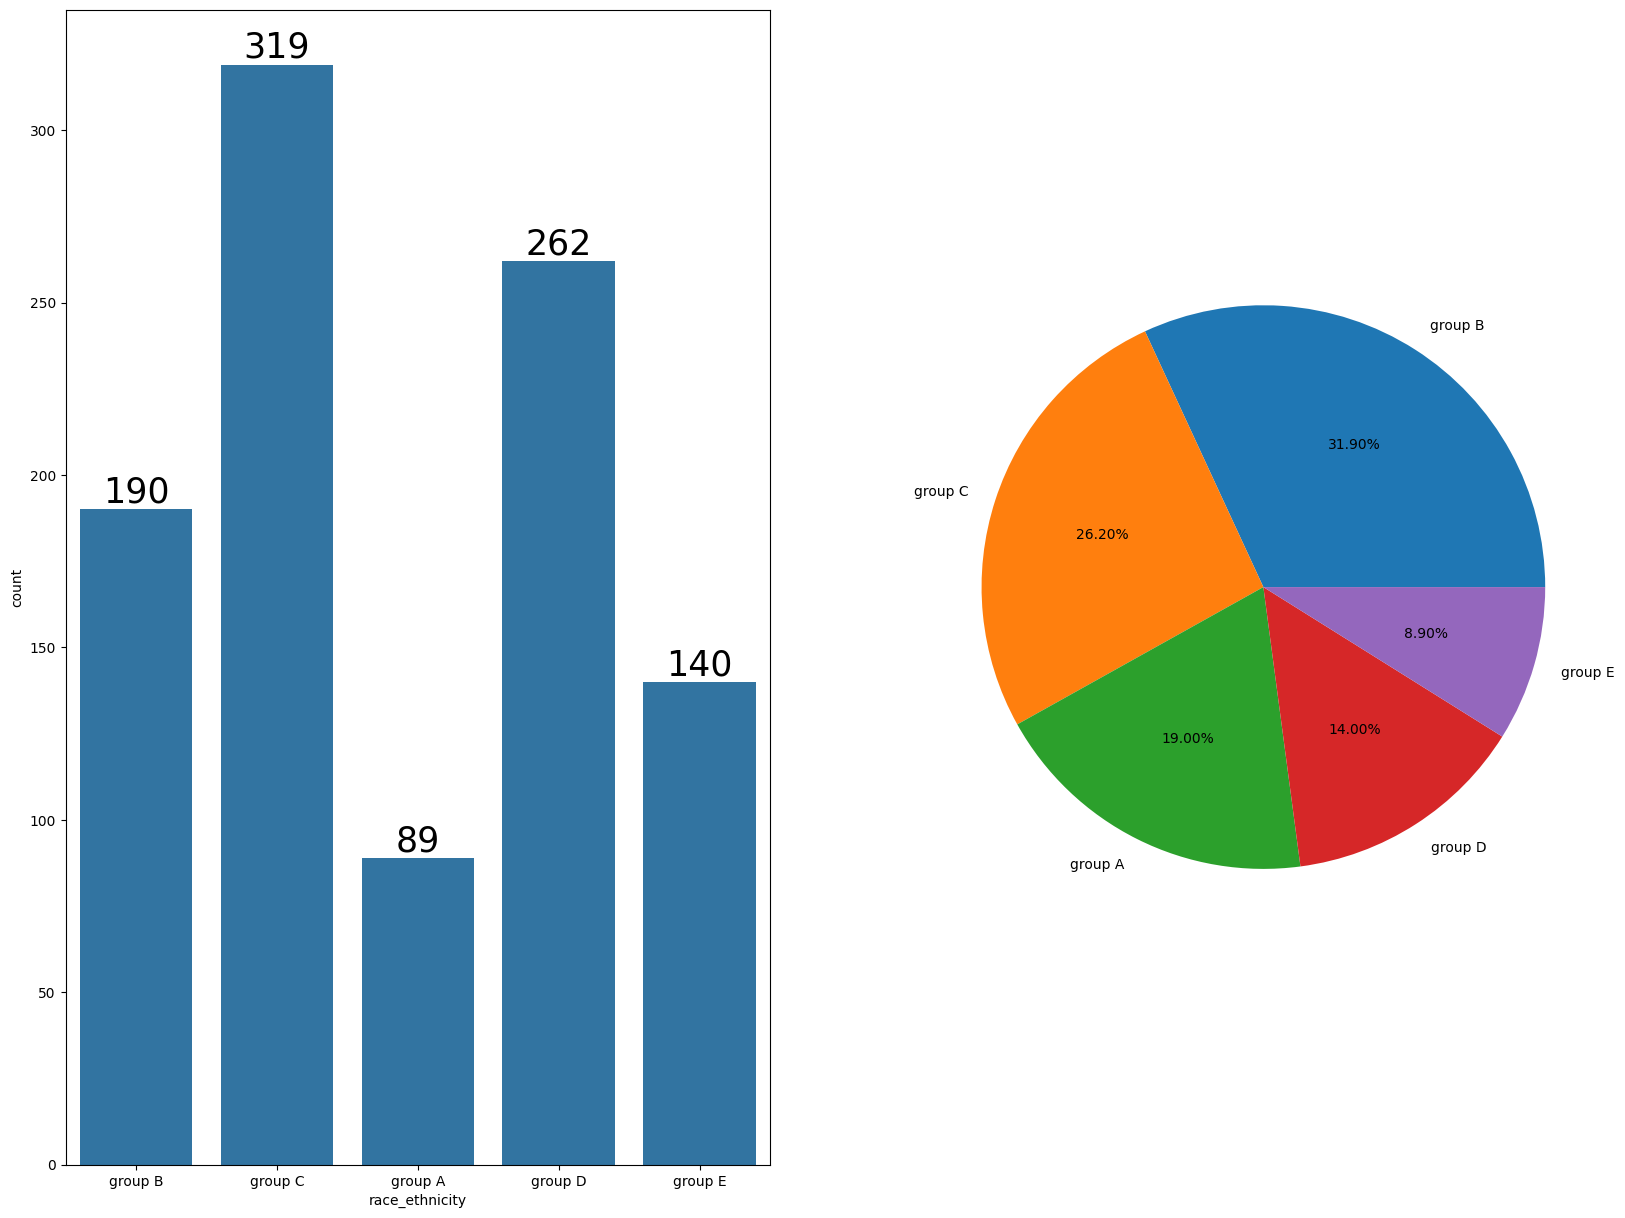

In [65]:
fig,ax = plt.subplots(1,2,figsize=(20,15))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=25)
plt.pie(x=df['race_ethnicity'].value_counts(),labels= ['group B','group C','group A','group D','group E'],autopct="%.2f%%")

<Axes: xlabel='race_ethnicity', ylabel='Total_score'>

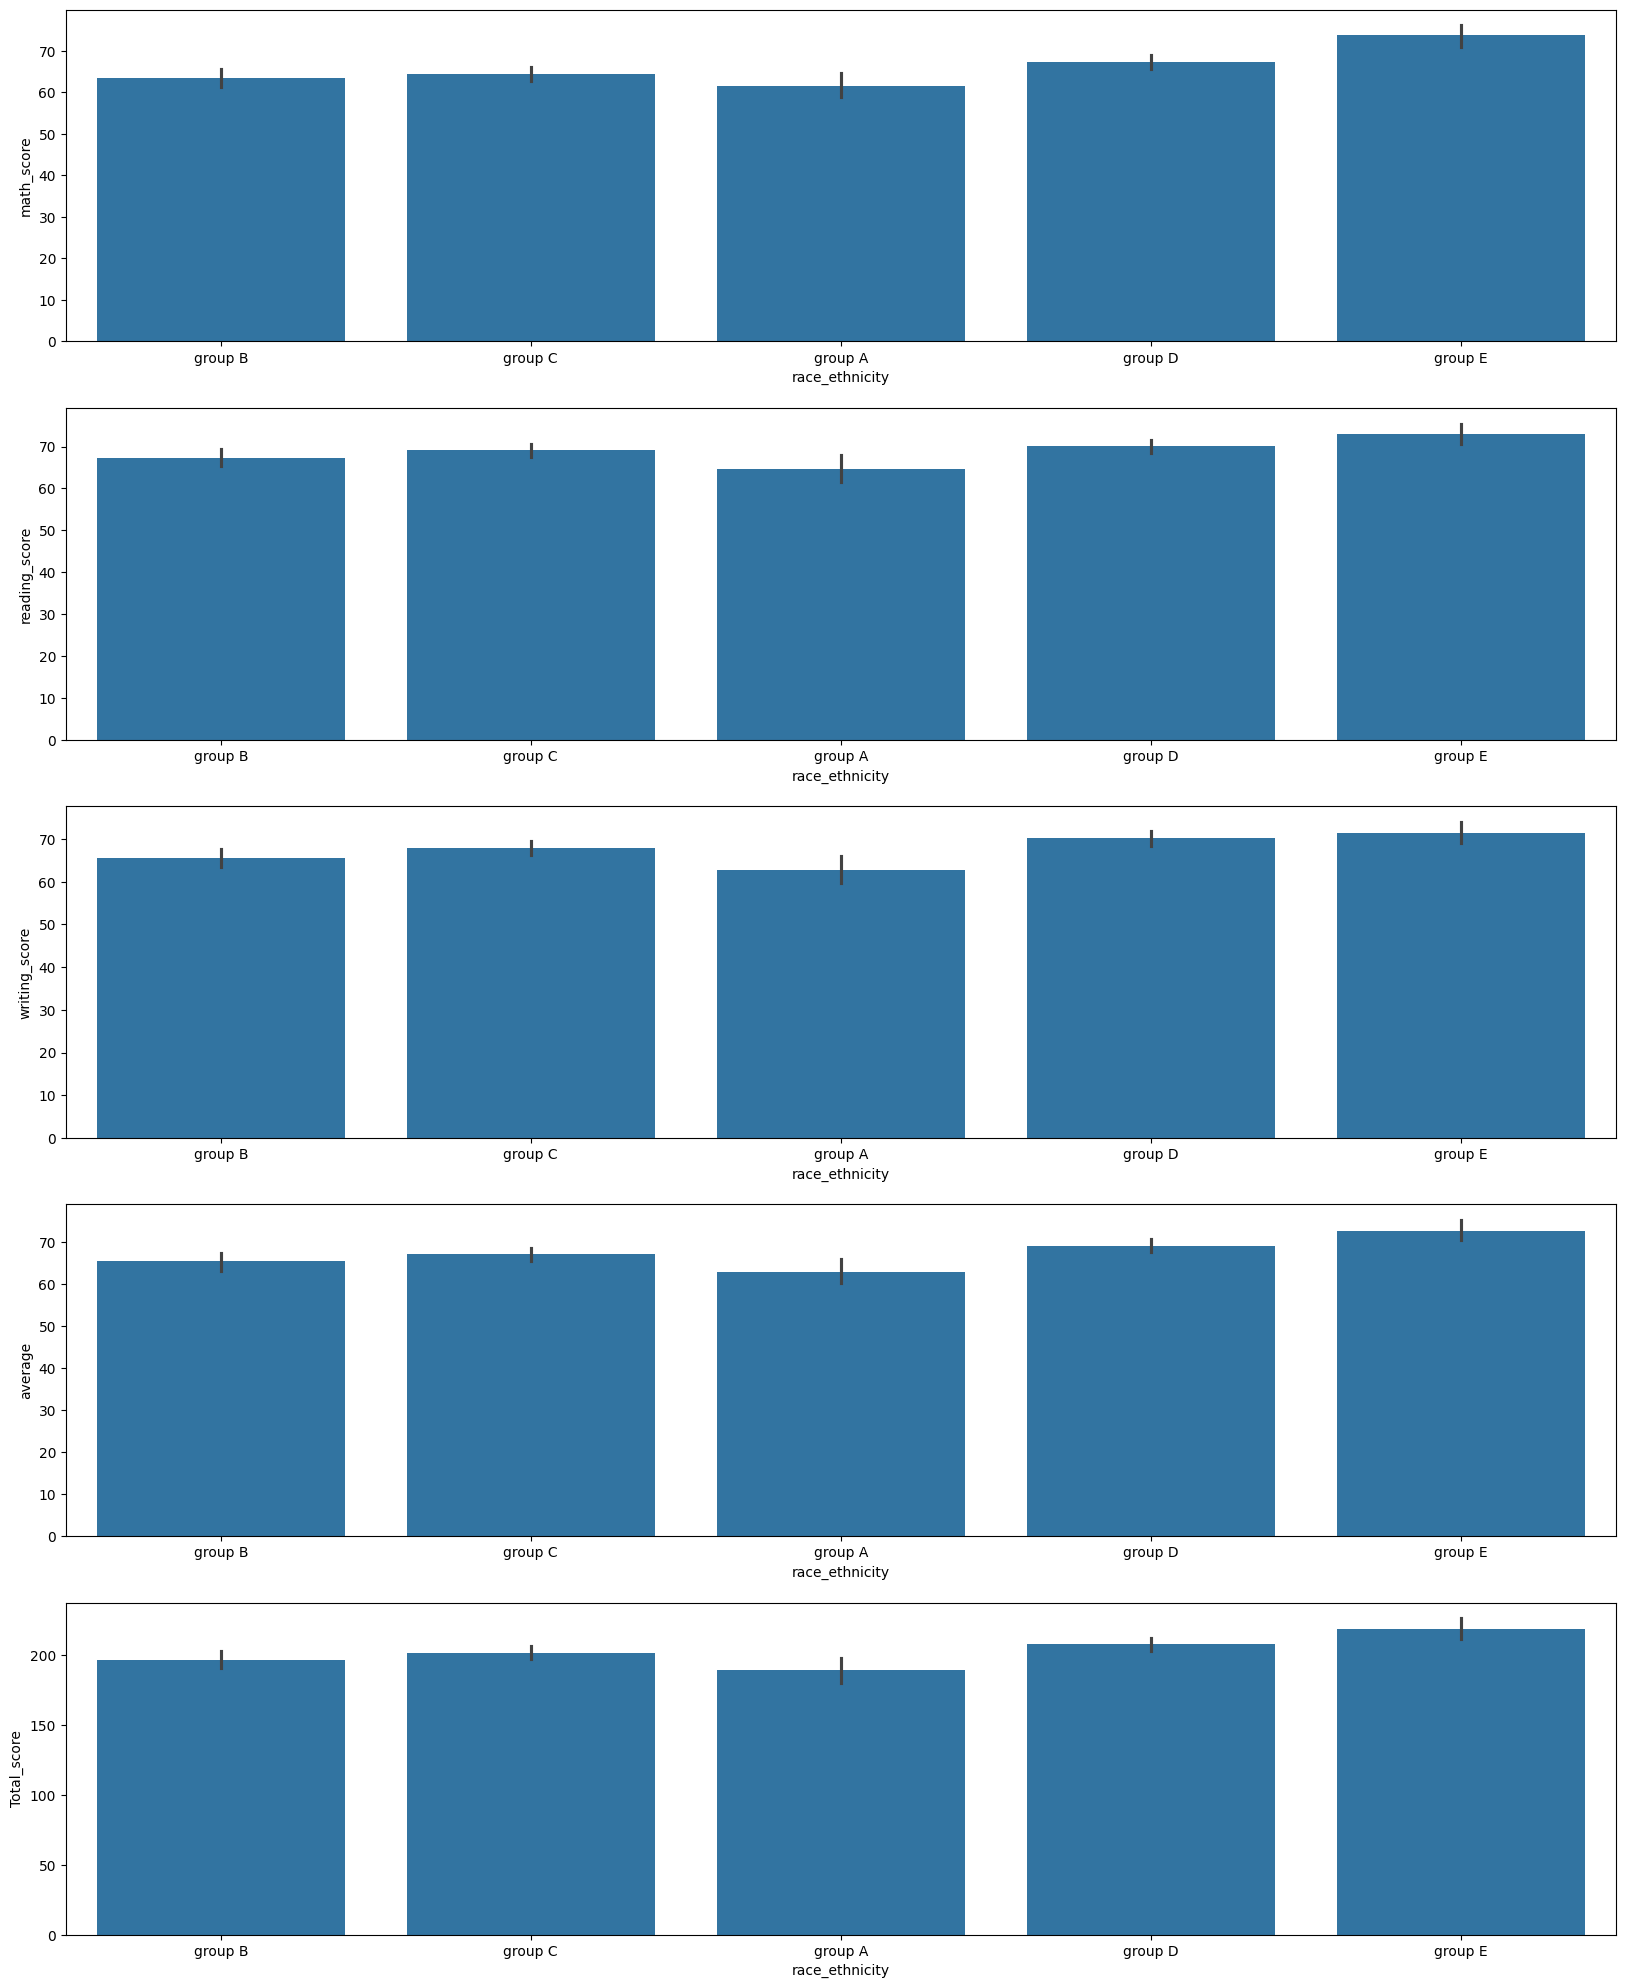

In [78]:
fig,ax = plt.subplots(5,1,figsize=(20,25))
plt.subplot(511)
sns.barplot(x='race_ethnicity',y='math_score',data=df)
plt.subplot(512)
sns.barplot(x='race_ethnicity',y='reading_score',data=df)
plt.subplot(513)
sns.barplot(x='race_ethnicity',y='writing_score',data=df)
plt.subplot(514)
sns.barplot(x='race_ethnicity',y='average',data=df)
plt.subplot(515)
sns.barplot(x='race_ethnicity',y='Total_score',data=df)

<Axes: xlabel='count', ylabel='parental_level_of_education'>

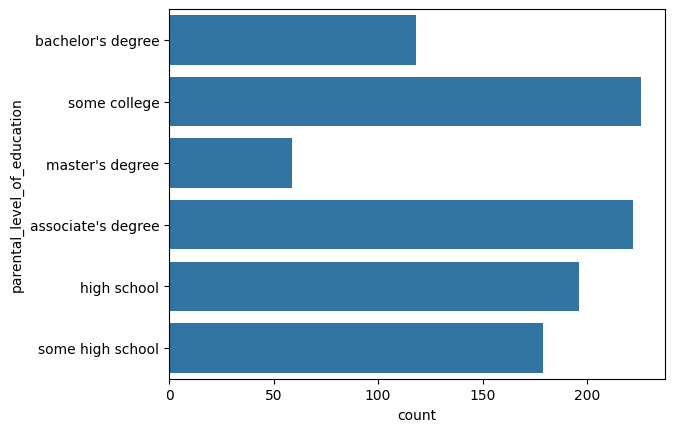

<Axes: xlabel='parental_level_of_education', ylabel='Total_score'>

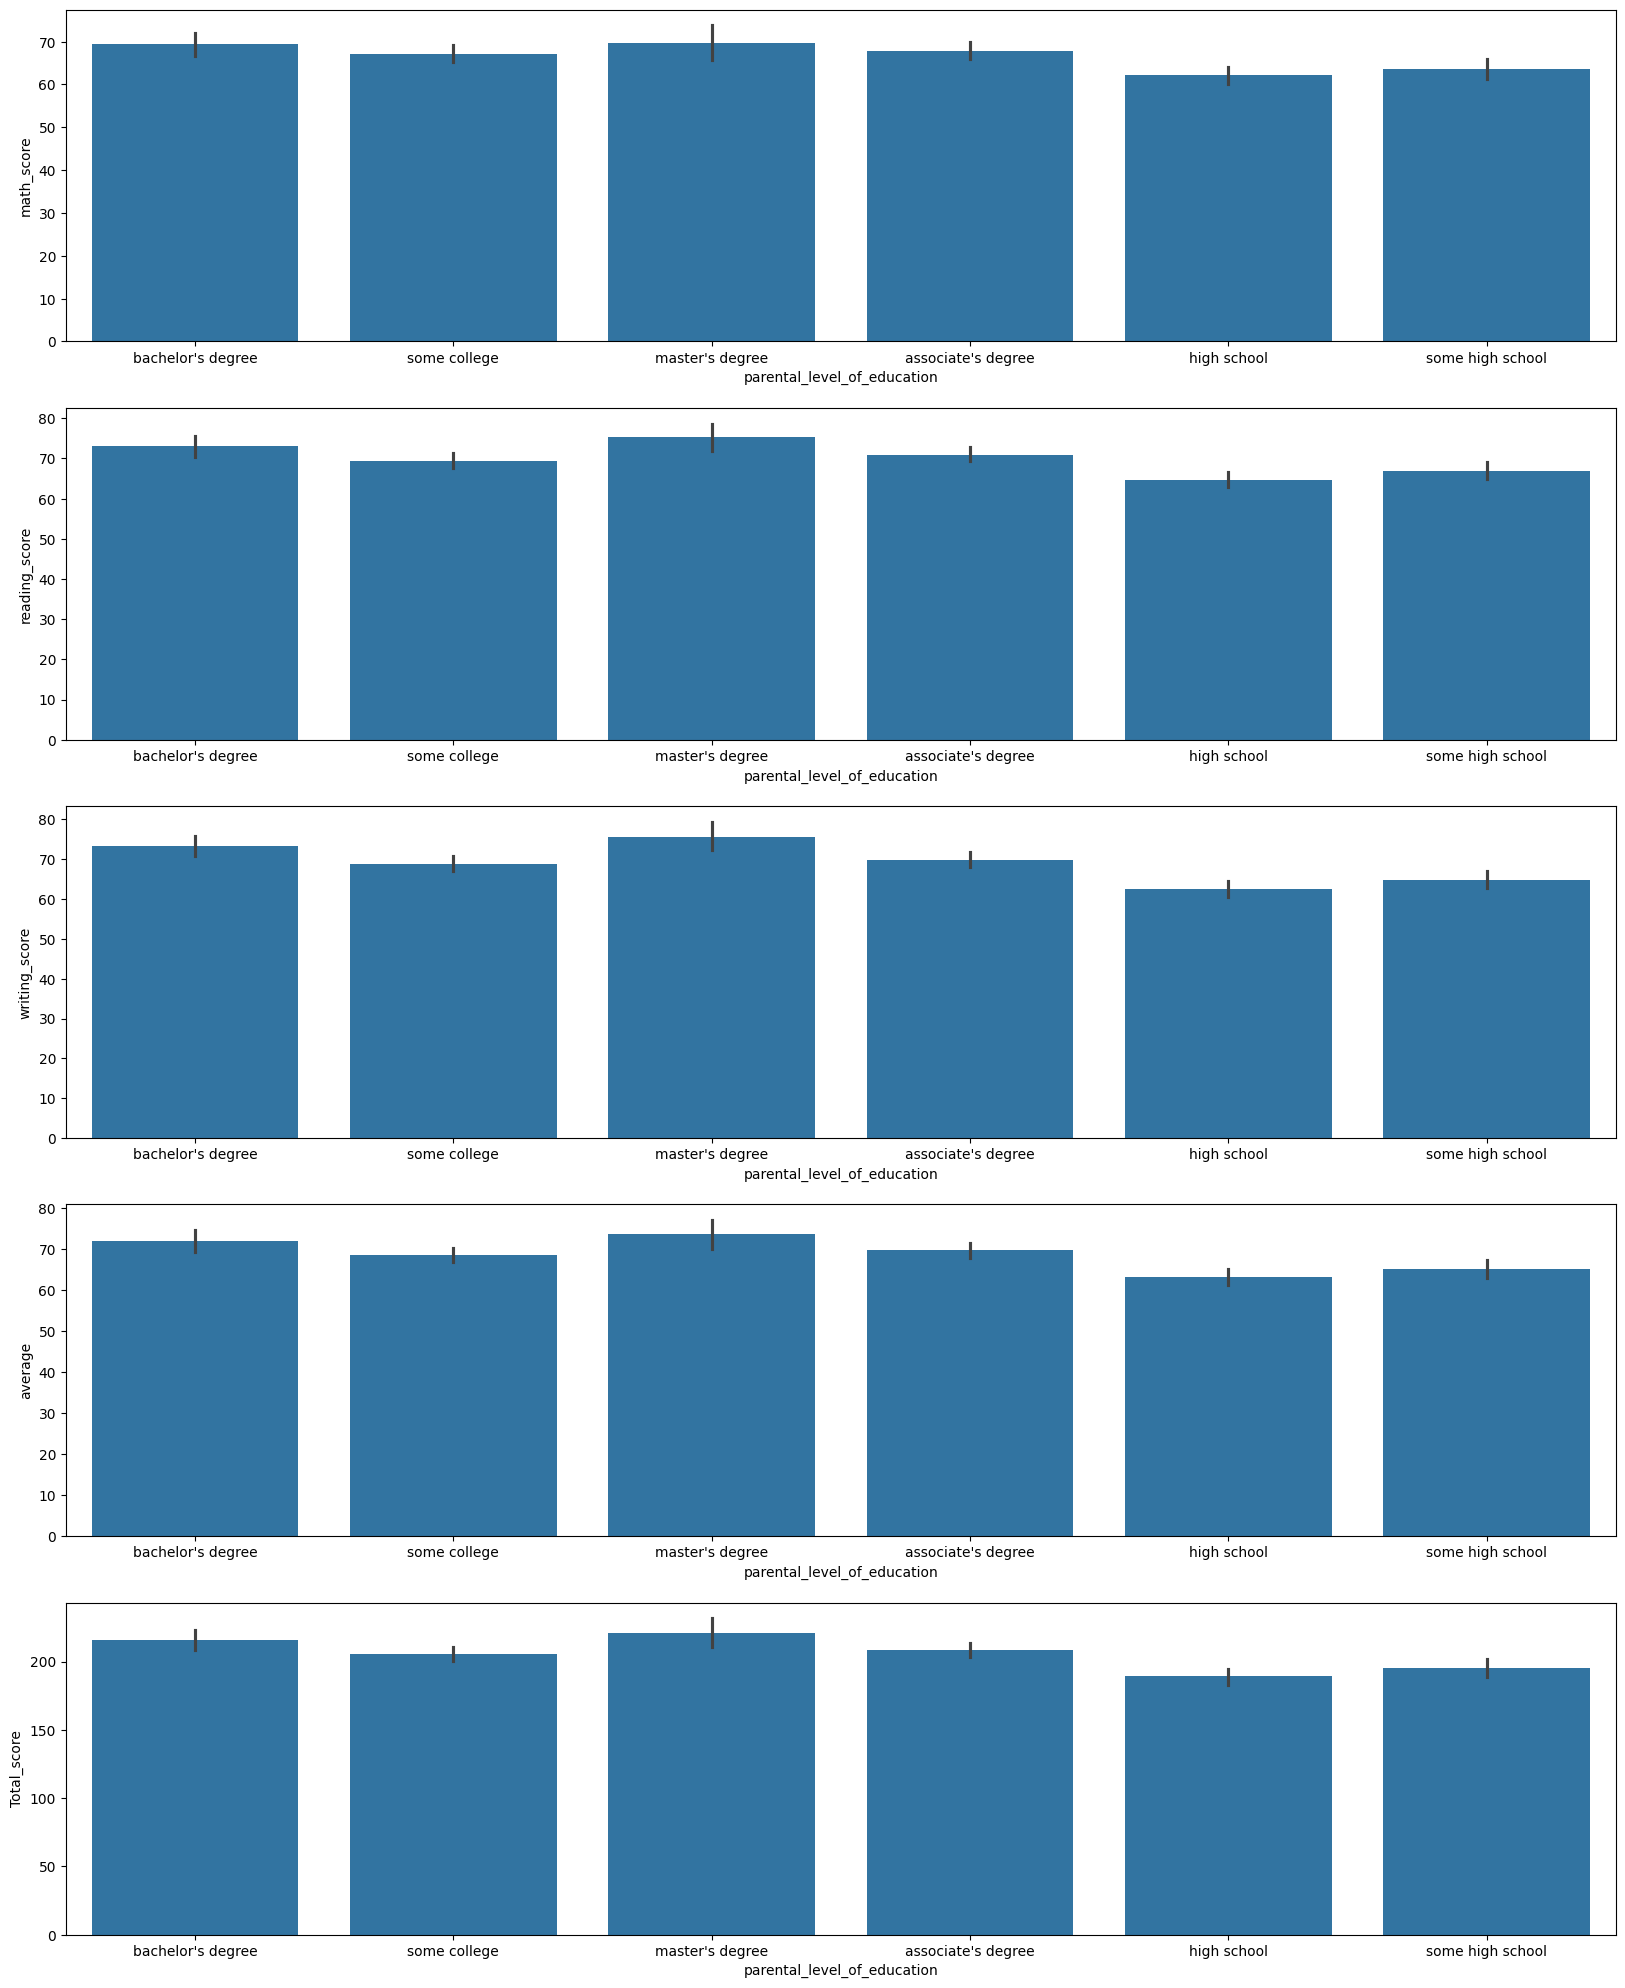

In [82]:
fig,ax = plt.subplots(5,1,figsize=(20,25))
plt.subplot(511)
sns.barplot(x='parental_level_of_education',y='math_score',data=df)
plt.subplot(512)
sns.barplot(x='parental_level_of_education',y='reading_score',data=df)
plt.subplot(513)
sns.barplot(x='parental_level_of_education',y='writing_score',data=df)
plt.subplot(514)
sns.barplot(x='parental_level_of_education',y='average',data=df)
plt.subplot(515)
sns.barplot(x='parental_level_of_education',y='Total_score',data=df)

Outliers

<Axes: ylabel='writing_score'>

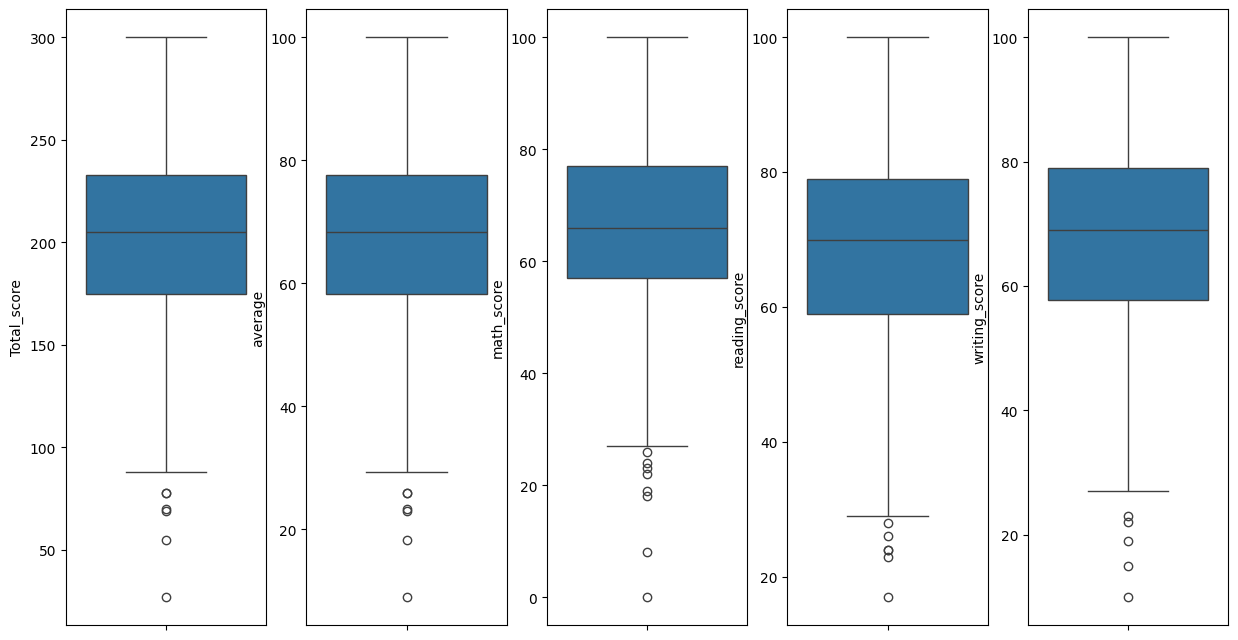

In [85]:
fig,ax=plt.subplots(1,5,figsize=(15,8))
plt.subplot(151)
sns.boxplot(df['Total_score'])
plt.subplot(152)
sns.boxplot(df['average'])
plt.subplot(153)
sns.boxplot(df['math_score'])
plt.subplot(154)
sns.boxplot(df['reading_score'])
plt.subplot(155)
sns.boxplot(df['writing_score'])

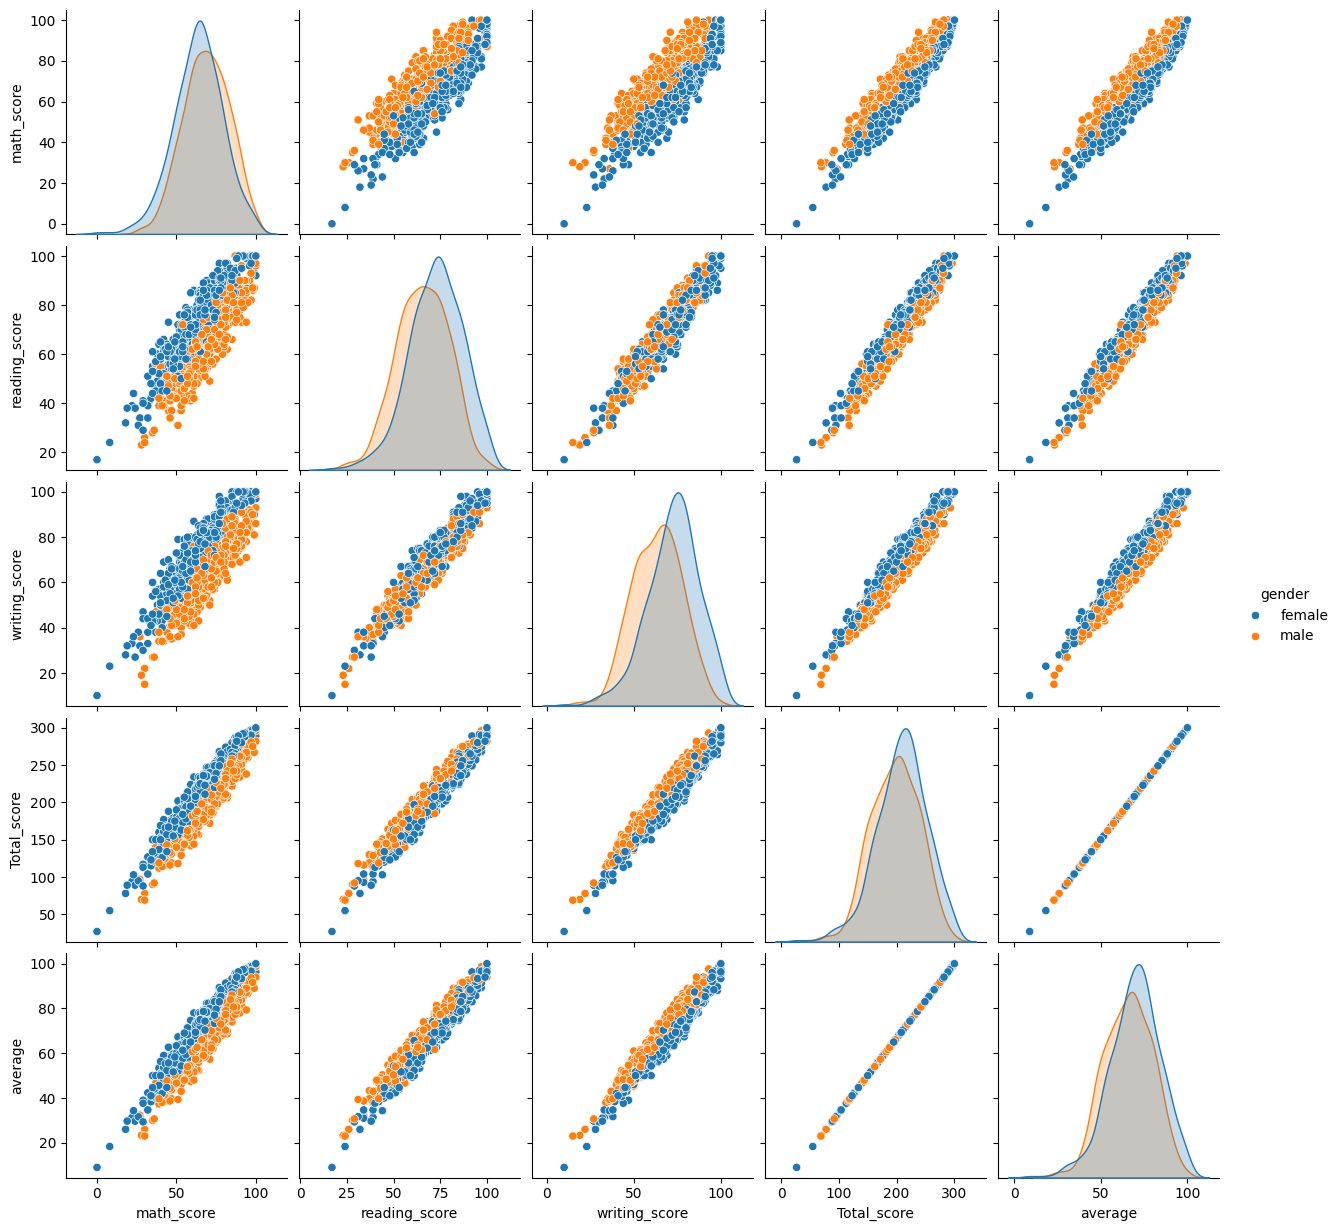

In [88]:
sns.pairplot(data=df,hue='gender')

<Axes: >

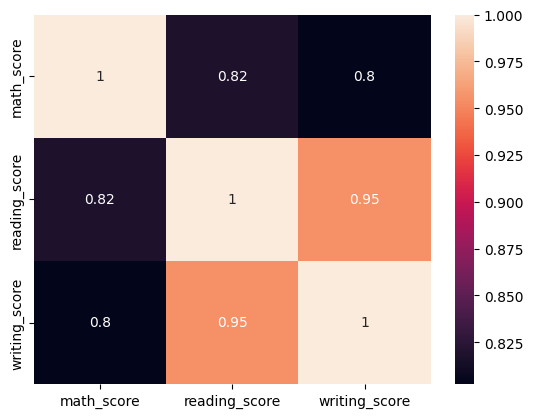

In [91]:
sns.heatmap(df[numerical_feature].corr(),annot=True)

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.